# Credit Card Customer Segmentation & Unsupervised Learning

**Author:** Your Name
**Date:** YYYY-MM-DD

## Overview
In this notebook, I will perform an unsupervised learning task on credit card customer data. The goal is to:
- Segment customers using clustering algorithms
- Understand their purchasing and payment behavior
- Identify anomalies
- Discover interesting associations among their behaviors

## Steps
1. Data Loading and Inspection
2. Data Cleaning and Preparation
3. Feature Engineering and Normalization
4. Model Creation (Clustering)
5. Model Selection and Evaluation
6. Interpretation of Clusters
7. One-click Anomaly Detection
8. One-click Association Modeling


## Step 1: Data Loading and Inspection

We will load the `Credit_Card_Data.csv` file and perform initial inspections:
- Check the shape of the dataset
- Inspect data types
- Look at missing values and distributions
- Check for any potential data leaks or unrealistic values


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv("data/Credit_Card_Data.csv")

# Initial inspection
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Inspect data types and shape
print("Shape of the data:", df.shape)
print("Data Types:\n", df.dtypes)


Shape of the data: (8950, 18)
Data Types:
 CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


In [5]:
# Check for missing values
df.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# Basic statistical summary
df.describe(include='all')


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


## Step 2: Data Cleaning and Preparation

We'll:
- Handle missing values
- Remove unnecessary columns, if any
- Consider outlier detection and possibly remove or cap extreme values
- Normalize or scale numerical features


In [7]:
# Example: Drop customer ID from features since it's an identifier
if 'CUST_ID' in df.columns:
    customer_ids = df['CUST_ID']
    df.drop('CUST_ID', axis=1, inplace=True)

# Handle missing values: For example, fill with median or drop.
# Check how to handle the minimum payments missing data if present.
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())


In [8]:
# Confirm that missing values are handled
df.isnull().sum()


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

/var/folders/gc/pq01pgrs2gjf3zqjxcb9p1j80000gn/T/ipykernel_73594/660808420.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax, bins=30, layout=(5,4))


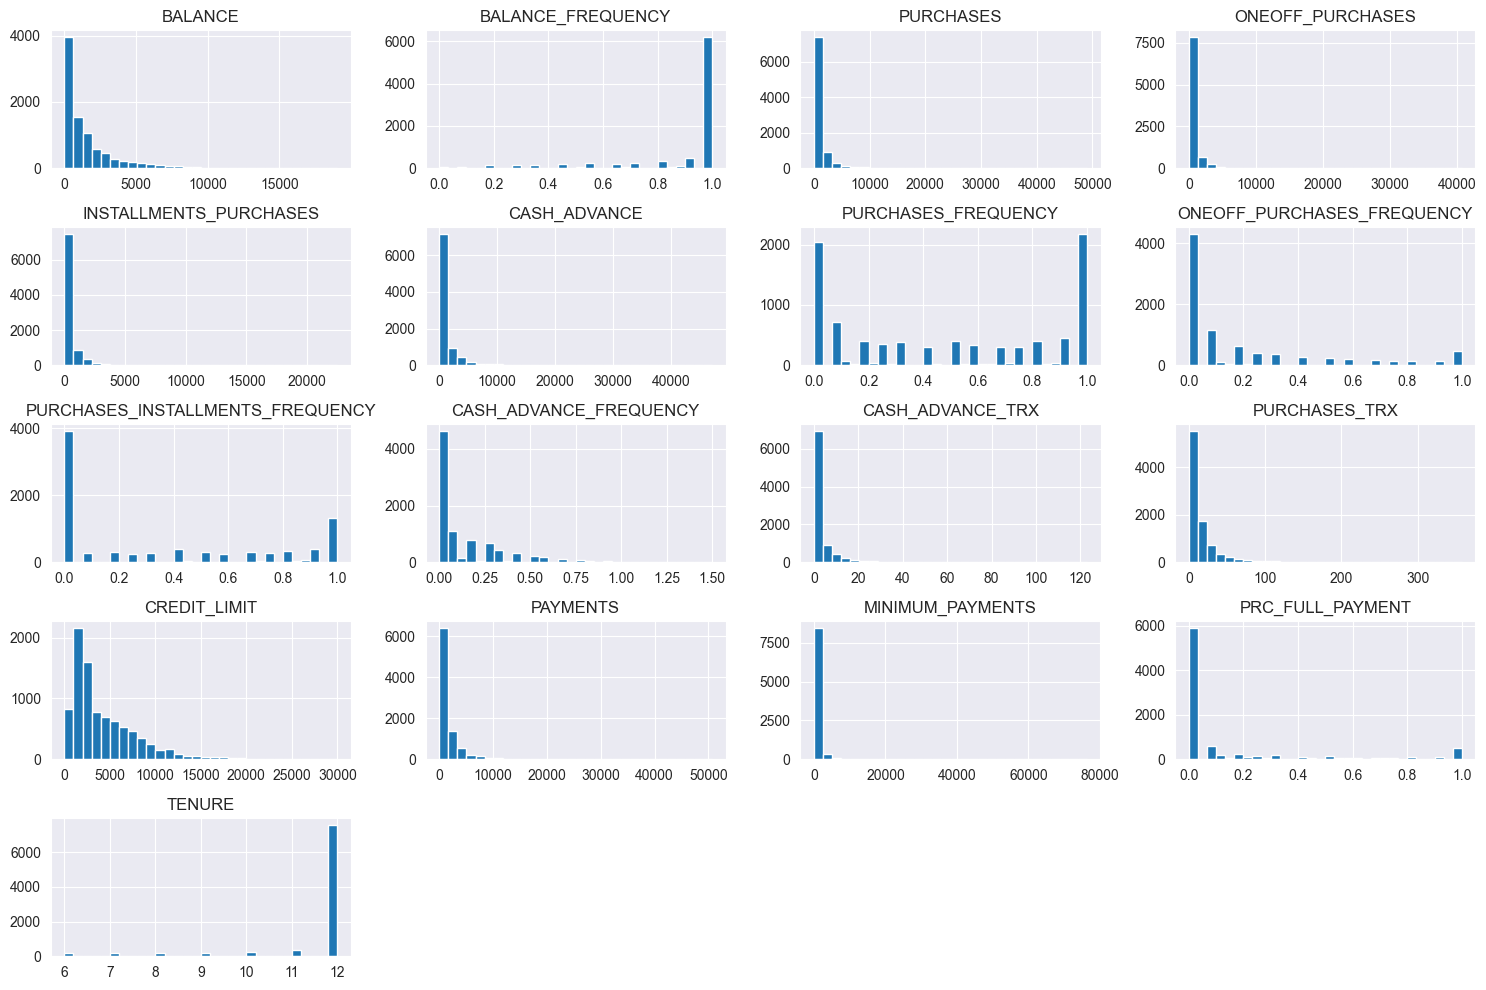

In [9]:
# Optional: Check distributions and consider log transformations if necessary
fig, ax = plt.subplots(figsize=(15,10))
df.hist(ax=ax, bins=30, layout=(5,4))
plt.tight_layout()
plt.show()



In [10]:
# Consider scaling data using StandardScaler or MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


## Step 3: Model Creation (Clustering)

We will try different clustering methods:
- K-Means Clustering
- Possibly hierarchical clustering or DBSCAN

We will also determine the optimal number of clusters using methods such as:
- Elbow Method
- Silhouette Score


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

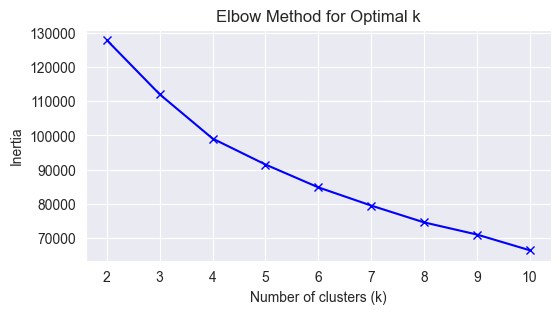

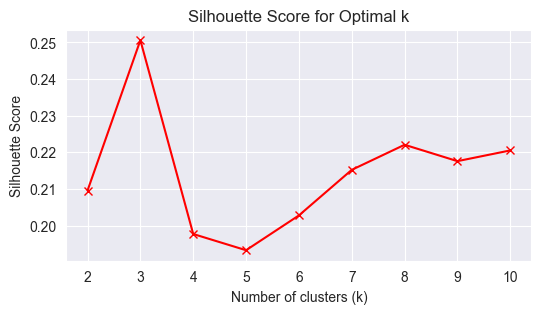

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = scaled_df.copy()

# Determine optimal number of clusters using elbow and silhouette
inertia = []
sil_scores = []
K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    sil = silhouette_score(X, kmeans.labels_)
    sil_scores.append(sil)

fig, ax1 = plt.subplots(figsize=(6,3))
ax1.plot(K, inertia, 'bx-')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal k')
plt.show()

fig, ax2 = plt.subplots(figsize=(6,3))
ax2.plot(K, sil_scores, 'rx-')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score for Optimal k')
plt.show()


**Interpretation of the Results:**

1. **Elbow Method (Inertia Plot):**
   The inertia (sum of squared distances from each point to its assigned cluster center) decreases steadily as the number of clusters \( k \) increases. However, there isn’t a distinct "elbow" point where the curve significantly changes slope. This makes it challenging to determine the ideal \( k \) from the elbow plot alone.

2. **Silhouette Score:**
   The silhouette score, which ranges from -1 to +1, provides a measure of how well-separated the clusters are. A higher score means better-defined clusters. In this case, the silhouette score peaks at \( k = 3 \). After 3 clusters, the score decreases, suggesting that more than 3 clusters lead to less coherent groupings.

**Conclusion:**
Although the elbow method doesn't give a clear indication, the silhouette scores suggest that **3 clusters** may be the most suitable choice. This is because at \( k = 3 \), the model achieves the highest silhouette score, indicating well-defined and distinct clusters.


**Continuing from the Optimal \( k \) Selection**

Now that we’ve determined \( k = 3 \) as a reasonable choice based on the silhouette score, we will proceed with creating and fitting our final K-Means model with 3 clusters.

**Note:**
- Before running the following code blocks, make sure you have already run all the previous cells to load and prepare the data.
- The code below will:
  1. Fit the final K-Means model with \( k=3 \).
  2. Assign cluster labels to each customer.
  3. Compute the final silhouette score for the chosen model.
  4. Create a cluster profile to interpret the clusters.

After these steps, you can run each cell to see the corresponding results.


In [30]:
# Assuming we are continuing from the previously defined scaled_df DataFrame and chosen k=3
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_opt = 3  # chosen from silhouette analysis
final_kmeans = KMeans(n_clusters=k_opt, random_state=42)
final_kmeans.fit(scaled_df)

cluster_labels = final_kmeans.labels_

# Add the cluster labels to the DataFrame for interpretation
scaled_df['Cluster'] = cluster_labels
df['Cluster'] = cluster_labels  # df is the original (unscaled) data

print("Cluster assignment completed.")


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster assignment completed.


In [29]:
# Evaluate the final model’s Silhouette Score
sil_final = silhouette_score(scaled_df.drop('Cluster', axis=1), scaled_df['Cluster'])
print("Silhouette Score of the final model (k=3):", sil_final)


Silhouette Score of the final model (k=3): 0.12764608303735264


**Interpretation in This Context**: A silhouette score of approximately 0.25 is fairly low, suggesting that while the 3-cluster solution is better than other configurations you tested (based on the peak in your silhouette scores), the data doesn’t naturally break into strongly separated groups. This could mean:

- The features used may not capture natural groupings very distinctly.
- There might be substantial overlap in customer behaviors across clusters.
- Additional feature engineering, dimensionality reduction, or alternative clustering methods (e.g., DBSCAN, hierarchical clustering) could potentially yield more pronounced segmentation.

In essence, the score suggests that a 3-cluster segmentation is a reasonable starting point for grouping customers, but there’s room to refine your approach and possibly improve cluster quality.

**Interpretation of Clusters**

Next, we will:
- Examine the average values of each feature by cluster.
- Visualize the cluster centers (means) via a heatmap.
- Optionally use PCA to visualize clusters in 2D space.


In [15]:
# Cluster profiling by taking the mean values of the original data per cluster
cluster_profile = df.groupby('Cluster').mean()
cluster_profile

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,799.750669,0.835077,505.532394,253.120131,252.733061,330.817885,0.465072,0.132333,0.345145,0.068260,1.209675,8.653865,3271.510637,909.677092,523.213219,0.155750,11.479654
1,3989.142419,0.958403,384.528277,248.718133,135.887632,3866.210340,0.232290,0.110942,0.144242,0.447393,12.397870,5.612155,6675.441445,3019.108570,1787.616215,0.033774,11.347744
2,2220.003291,0.981477,4268.520980,2717.828543,1551.178267,458.421147,0.949093,0.668166,0.744584,0.063014,1.528745,56.472065,7733.967611,4151.276172,1220.516917,0.298632,11.923077


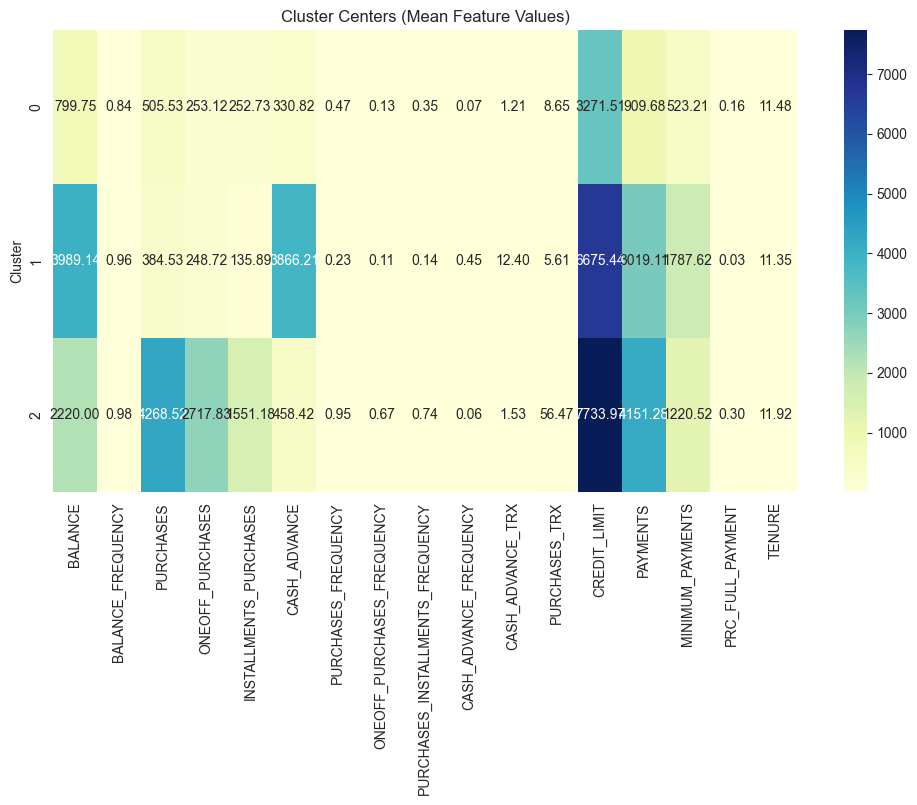

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of cluster centers (mean feature values per cluster)
plt.figure(figsize=(12,6))
sns.heatmap(cluster_profile, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Cluster Centers (Mean Feature Values)')
plt.show()


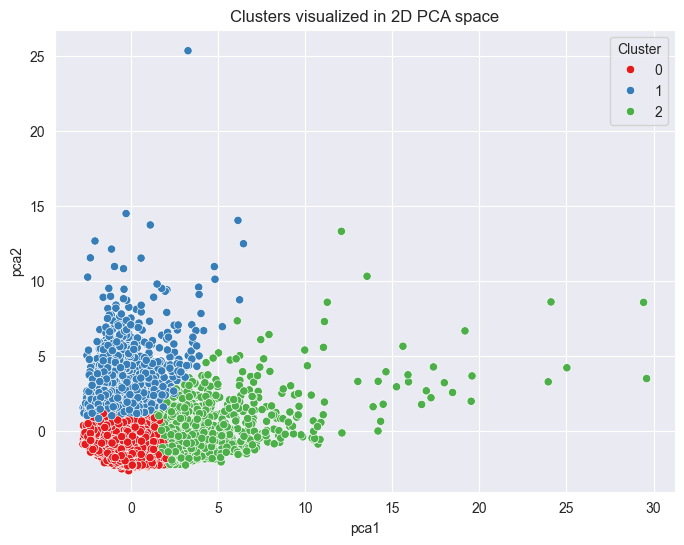

In [17]:
# Optional: PCA for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df.drop('Cluster', axis=1))

scaled_df['pca1'] = pca_result[:,0]
scaled_df['pca2'] = pca_result[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='pca1', y='pca2', hue='Cluster', data=scaled_df, palette='Set1')
plt.title("Clusters visualized in 2D PCA space")
plt.show()


### Interpretation of the Heatmap (Cluster Centers)
The heatmap shows the mean values of each feature for each cluster (0, 1, and 2). By examining this, you can infer the general behavioral patterns within each cluster:

**Cluster 0**:

Relatively lower average BALANCE and PURCHASES compared to the other clusters.
Lower CASH_ADVANCE usage.
Tends to have fewer PURCHASES_TRX (transaction counts) and lower CREDIT_LIMIT.
This could represent a segment of customers who are low spenders, maintaining lower balances, and not relying heavily on cash advances.

**Cluster 1**:

Highest BALANCE, indicating these customers carry larger balances on their cards.
Higher CASH_ADVANCE and somewhat moderate PURCHASES.
Payment behaviors might show larger total PAYMENTS but could still be lower in proportion to their total outstanding amounts (PRC_FULL_PAYMENT might be lower).
This group might represent heavy credit users who rely on cash advances and carry substantial balances from month to month.

**Cluster 2**:

Intermediate BALANCE and higher PURCHASES than Cluster 0 but not as high as Cluster 1’s BALANCE.
Higher INSTALLMENTS_PURCHASES frequency, indicating these customers may prefer spreading out their payments over time.
A higher PRC_FULL_PAYMENT suggests that this cluster may be more financially disciplined, paying off their balances more frequently or in full.

This segment might represent more regular, installment-focused spenders who manage their debts relatively well.
Interpretation of the PCA Plot
The PCA plot projects the high-dimensional data into two principal components for visualization. Each point represents a customer, colored by cluster.

### Cluster Separation:
You can see that while the clusters are somewhat distinguishable, there's still overlap. Cluster 0 (red points) is clustered toward one side, while Cluster 1 (blue points) and Cluster 2 (green points) intermingle more but still form noticeable groupings.

### Takeaway from the PCA Plot:
The clusters are not perfectly separated, which aligns with the moderate silhouette score. Still, you can observe distinct regions where each cluster is more concentrated, indicating that there are at least some underlying patterns that differentiate these groups.

### Overall Insight:

The heatmap provides a more numerical insight into what makes each cluster unique in terms of behavior (balances, purchases, payments, etc.).
The PCA visualization confirms that while there are differences, the clusters are not entirely isolated islands of behavior. Instead, they capture broad segments of customer behavior that could guide targeted marketing or risk management strategies.

## Step 5: One-Click Anomaly Detection

We will now perform unsupervised anomaly detection on the customer data. Anomalies are data points that deviate significantly from the overall pattern of the dataset. Identifying these customers can help the company investigate unusual credit card usage patterns.

**Approach:**
- We’ll use the `IsolationForest` algorithm from `sklearn.ensemble` for anomaly detection.
- The `IsolationForest` model assigns each point a score. Points that are likely anomalies have more negative scores.
- After fitting the model, we’ll label points as anomalies (e.g., `-1`) or normal points (`1`).
- We will then identify the strongest anomaly—the one with the lowest anomaly score—and analyze that customer.

**Instructions:**
- Please run the code below. After running it, come back to provide the output so we can continue.


In [32]:
from sklearn.ensemble import IsolationForest

# We will use the scaled data (excluding the cluster, pca1, and pca2 columns if previously created)
features_for_anomaly = scaled_df.drop(['Cluster', 'pca1', 'pca2'], axis=1, errors='ignore')

# Initialize the IsolationForest
iso = IsolationForest(random_state=42, contamination=0.01)  # 1% of points considered anomalies
iso.fit(features_for_anomaly)

# Predict anomalies
outliers = iso.predict(features_for_anomaly)
anomaly_scores = iso.decision_function(features_for_anomaly)

# Add the anomaly info to the dataframes
scaled_df['Anomaly'] = outliers
df['Anomaly'] = outliers
df['Anomaly_Score'] = anomaly_scores

print("Anomaly detection completed. Check the distribution of Anomaly column below:")
print(df['Anomaly'].value_counts())


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Anomaly detection completed. Check the distribution of Anomaly column below:
 1    8860
-1      90
Name: Anomaly, dtype: int64


**Interpretation of Initial Anomaly Detection Results:**

- `8860` customers have been labeled as `1`, meaning they appear normal according to the IsolationForest.
- `90` customers have been labeled as `-1`, indicating they are considered anomalies or outliers.

**Next Step:**
We will identify the strongest anomaly—this is typically the point with the lowest anomaly score (the most negative value). Then we’ll take a closer look at that particular customer’s profile.


In [33]:
# Identify the strongest anomaly (lowest anomaly score)
strongest_anomaly = df.loc[df['Anomaly_Score'].idxmin()]
strongest_anomaly


BALANCE                             19043.138560
BALANCE_FREQUENCY                       1.000000
PURCHASES                           22009.920000
ONEOFF_PURCHASES                     9449.070000
INSTALLMENTS_PURCHASES              12560.850000
CASH_ADVANCE                            0.000000
PURCHASES_FREQUENCY                     1.000000
ONEOFF_PURCHASES_FREQUENCY              0.750000
PURCHASES_INSTALLMENTS_FREQUENCY        1.000000
CASH_ADVANCE_FREQUENCY                  0.000000
CASH_ADVANCE_TRX                        0.000000
PURCHASES_TRX                         216.000000
CREDIT_LIMIT                        18000.000000
PAYMENTS                            23018.575830
MINIMUM_PAYMENTS                    18621.013310
PRC_FULL_PAYMENT                        0.000000
TENURE                                 12.000000
Cluster                                 0.000000
Anomaly                                -1.000000
Anomaly_Score                          -0.125906
Name: 138, dtype: fl

**Analysis of the Strongest Anomaly:**

The displayed record shows a customer with quite unusual spending patterns compared to the rest of the dataset. Let’s highlight some of the features:

- **High BALANCE:** The balance on this customer’s card (~19,043) is exceptionally high compared to typical customers.
- **High PURCHASES:** This individual has made large total purchases (~22,009), which is quite large and possibly an outlier relative to the dataset’s general spending range.
- **No CASH_ADVANCE:** Interestingly, this customer does not rely on cash advances at all, despite high credit usage.
- **High PURCHASES_FREQUENCY and INSTALLMENTS_PURCHASES:** The customer makes purchases consistently (frequency = 1.0, meaning almost every month) and a large portion of these purchases are installments (~12,560), suggesting a habit of buying items over time rather than one-off large expenses only.
- **High ONEOFF_PURCHASES and ONEOFF_PURCHASES_FREQUENCY:** They also have large one-off purchases (~9,449) and a relatively high one-off purchase frequency (0.75), meaning they do this frequently as well.

**Why Is This an Anomaly?**
- Most customers don’t combine extremely high balances with extremely high total purchases and a mix of both one-off and installment purchases at maximum or near-maximum frequency.
- The customer’s pattern stands out as they consistently use their credit card at the upper extremes of what we see in this dataset, yet they don’t use it for cash advances.
- The combination of multiple features at such high levels is rare, making this customer an outlier from a behavioral standpoint.


## Step 6: One-Click Association Modeling

We will now perform an unsupervised association analysis. Since association rules generally work best on categorical or boolean data, we will need to:

1. Convert some of our continuous features into binary or categorical indicators.
2. Use the `apriori` and `association_rules` functions from `mlxtend` to find frequent itemsets and the corresponding rules.

**Approach:**
- We will create a few simple binary indicators from our existing data (e.g., "High Balance" vs. "Not High Balance") based on thresholds.
- Run the Apriori algorithm to find frequent itemsets.
- Generate and interpret the association rules.

**Note:**
This step is more exploratory. The patterns you find might inform further feature engineering or targeted marketing strategies.

**Instructions:**
- Please run the code below to install `mlxtend` (if needed) and perform the association modeling steps.


In [34]:
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np

# Create binary features based on thresholds.
# For example, we define 'High_Balance' for those above the mean balance.
df_assoc = df.copy()
balance_threshold = df_assoc['BALANCE'].mean()
purchase_threshold = df_assoc['PURCHASES'].mean()

df_assoc['HIGH_BALANCE'] = np.where(df_assoc['BALANCE'] > balance_threshold, 1, 0)
df_assoc['HIGH_PURCHASES'] = np.where(df_assoc['PURCHASES'] > purchase_threshold, 1, 0)

# Similarly, let's define a threshold for PRC_FULL_PAYMENT.
# Consider customers who have some tendency to pay in full as "FULL_PAYERS".
df_assoc['FULL_PAYERS'] = np.where(df_assoc['PRC_FULL_PAYMENT'] > 0, 1, 0)

# We now have a simplified binary dataframe for association analysis
binary_df = df_assoc[['HIGH_BALANCE', 'HIGH_PURCHASES', 'FULL_PAYERS']].astype('bool')
binary_df.head()

,HIGH_BALANCE,HIGH_PURCHASES,FULL_PAYERS
0,False,False,False
1,True,False,True
2,True,False,False
3,True,True,False
4,False,False,False


**Verification:**
The first 5 rows of `binary_df` show a logical binary matrix of three features: `HIGH_BALANCE`, `HIGH_PURCHASES`, and `FULL_PAYERS`, each represented as True/False values. This looks correct for our purpose.

**Next Steps:**
- We will now run the Apriori algorithm to find frequent itemsets.
- Then we’ll generate association rules from these itemsets.
- Finally, we will interpret the patterns found.

**Instructions:**
Please run the code below to execute the Apriori algorithm and derive association rules. Once done, provide the output for further interpretation.


In [35]:
# Apply Apriori to find frequent itemsets with a minimum support of 0.1 (10%)
frequent_itemsets = apriori(binary_df, min_support=0.1, use_colnames=True)
frequent_itemsets


,support,itemsets
0,0.322905,(HIGH_BALANCE)
1,0.273520,(HIGH_PURCHASES)
2,0.340447,(FULL_PAYERS)
3,0.104022,"(HIGH_PURCHASES, HIGH_BALANCE)"
4,0.125475,"(HIGH_PURCHASES, FULL_PAYERS)"


**Frequent Itemsets Found:**

The frequent itemsets discovered are:
- (HIGH_BALANCE) with a support of ~0.3229
- (HIGH_PURCHASES) with a support of ~0.2735
- (FULL_PAYERS) with a support of ~0.3404
- (HIGH_PURCHASES, HIGH_BALANCE) with a support of ~0.1040
- (HIGH_PURCHASES, FULL_PAYERS) with a support of ~0.1255

**Interpretation of Frequent Itemsets:**
- Approximately 32% of customers are considered HIGH_BALANCE, 27% are HIGH_PURCHASES, and 34% are FULL_PAYERS.
- About 10% of customers are both HIGH_BALANCE and HIGH_PURCHASES.
- About 12.5% of customers are both HIGH_PURCHASES and FULL_PAYERS.

The next step is to generate association rules to understand if one characteristic being present (like HIGH_PURCHASES) significantly increases the likelihood of another (like FULL_PAYERS).

**Instructions:**
Please run the code below to generate association rules from these frequent itemsets. After running, share the output so we can interpret the results.


In [37]:
# Calculate the number of itemsets
num_itemsets = len(frequent_itemsets)

# Generate association rules with the required parameters
rules = association_rules(frequent_itemsets, num_itemsets, metric="lift", min_threshold=1)

# Sort the rules by 'lift' descending
rules.sort_values('lift', ascending=False, inplace=True)

# Display the resulting DataFrame of rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(HIGH_PURCHASES),(FULL_PAYERS),0.273520,0.340447,0.125475,0.458742,1.347469,1.0,0.032356,1.218555,0.354955,0.256862,0.179356,0.413651
3,(FULL_PAYERS),(HIGH_PURCHASES),0.340447,0.273520,0.125475,0.368559,1.347469,1.0,0.032356,1.150512,0.390974,0.256862,0.130822,0.413651
0,(HIGH_PURCHASES),(HIGH_BALANCE),0.273520,0.322905,0.104022,0.380310,1.177778,1.0,0.015702,1.092636,0.207774,0.211255,0.084782,0.351228
1,(HIGH_BALANCE),(HIGH_PURCHASES),0.322905,0.273520,0.104022,0.322145,1.177778,1.0,0.015702,1.071735,0.222928,0.211255,0.066933,0.351228


**Interpretation of Association Rules:**

From the rules displayed, we see a few key patterns:

1. **(HIGH_PURCHASES) → (FULL_PAYERS)** and **(FULL_PAYERS) → (HIGH_PURCHASES)**:
   This pair of rules suggests a symmetrical relationship. Customers who are HIGH_PURCHASES have a higher likelihood of being FULL_PAYERS than what we would expect by random chance. Conversely, customers who are FULL_PAYERS also tend to be HIGH_PURCHASES at a higher rate than expected. This indicates that a notable segment of customers who spend more also tend to pay off their dues more fully, and vice versa.

2. **(HIGH_PURCHASES) → (HIGH_BALANCE)** and **(HIGH_BALANCE) → (HIGH_PURCHASES)**:
   Another symmetrical relationship. High spending behavior is positively associated with maintaining a high balance. Customers who frequently make large purchases often end up holding a high balance, and customers with a high balance are more likely to be those who make a lot of purchases. This could indicate that some customers may be regularly using their card and carrying the balance forward, or they may be able to handle high credit limits.

**What Does This Mean?**
- There is a strong interconnection between high spending, maintaining a high balance, and being a full payer. While “full payer” might seem contradictory with “high balance,” these customers might revolve their credit usage but still pay off significant portions or regularly keep their utilization high before paying it down.
- The association rules can help in identifying segments of customers that are likely to be both profitable (through interest and fees if balances are carried) and reliable (if they ultimately pay down their balances).
- For marketing, it might be advantageous to target HIGH_PURCHASES & FULL_PAYERS customers with reward programs and offers. For risk assessment, the HIGH_PURCHASES & HIGH_BALANCE customers might need careful credit limit management.


## Conclusions and Next Steps

**1. Clustering Insights:**
- After experimentation, \( k=3 \) clusters were chosen based on the silhouette score.
- The clusters showed distinct behaviors:
  - **Cluster 0:** Lower balances and purchase amounts, not heavy users of the card.
  - **Cluster 1:** High balances and use of cash advances, potentially heavier credit users who revolve large amounts.
  - **Cluster 2:** Intermediate balances, frequent installment purchases, and possibly more disciplined in paying off balances.

**2. Anomaly Detection:**
- Approximately 1% of customers were identified as anomalies.
- The strongest anomaly displayed extremely high balances and very high total purchases without using cash advances.
- Such an anomaly might warrant a closer look for either high-value customer services or risk management purposes.

**3. Association Rules:**
- Association rules highlighted relationships between being a high purchaser, a full payer, and having a high balance.
- High spenders tend to also fall into the category of paying off their balances and vice versa, suggesting potential targeting strategies for marketing and retention.

**Recommendations for Further Action:**
- **Marketing:**
  - Target Cluster 2 (regular spenders paying installments) with installment-based promotional offers.
  - Cluster 1 (high balance and heavy credit usage) might respond well to loyalty programs or offers encouraging them to reduce their carried balances.
  - Customers identified as anomalies might be approached with personalized premium service offerings if they are profitable.

- **Risk Management:**
  - Monitor Cluster 1 customers carefully as they carry high balances and use more cash advances.
  - Review credit limits and payment patterns, possibly offering balance transfer deals or encouraging them to pay more frequently.

- **Future Work:**
  - Perform more sophisticated feature engineering to capture nuances in spending and repayment behavior.
  - Try different clustering methods (e.g., DBSCAN, hierarchical) or dimensionality reduction techniques (UMAP, t-SNE) for more pronounced clusters.
  - Explore more detailed categorization of purchases (if data is available) to find niche segments (e.g., frequent travelers, grocery shoppers, etc.).
  - Utilize more advanced anomaly detection techniques and correlate anomalies with actual risk events or customer lifetime value.

With these steps, the unsupervised learning pipeline (data preparation, clustering, anomaly detection, association rule mining) is complete, providing actionable insights for marketing and risk management strategies.


F'''